<a href="https://colab.research.google.com/github/armanalam6342/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##<b> Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc
# import Gridsearch cv & Randomsearch cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBRegressor

## <b> Loading the dataset

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data science/Capstone Projects/Credit Card Default Prediction - Shyam Sundar K/default of credit card clients.xls")

In [ ]:
# Copy data for backup
df = data.copy()

In [ ]:
# Checking top 5 rows of the data
df.head()

#<b> Preprocessing

In [ ]:
# Droping 'Unnamed: 0' column 
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [ ]:
 # replace column name with columns list
df.set_axis(columns, axis=1, inplace=True)

In [ ]:
# droping the axis 0
df=df.drop(0,axis=0).reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
# Checking the shape of data
df.shape

In [ ]:
# checking information about each column, but all columns dtype is in object
df.info()

In [ ]:
# Converting all columns from Object to int 
for i in df.columns:
  df[i]=df[i].astype('int')

In [ ]:
# Describing data set
df.describe()

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [ ]:
# Checking duplicates in the data
# we have duplicates of non defaulter - 29 and defaulter 6
duplicates = df[df.duplicated()]
duplicates.Defaulter.value_counts()

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Checking null values. So we don't have any missing values
df.isnull().sum()

So we don't have any missing value

#<b> Feature Engineering on Categorical Feature

In [ ]:
# Value count of Gender Column
df.Gender.value_counts()

In [ ]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

In [ ]:
# Value count of Education Column
df.Education.value_counts()

In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others

In [ ]:
# 
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

In [ ]:
# Value count of Marital_status Column
df.Marital_status.value_counts()

data given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others

In [ ]:
# 
df['Marital_status']=df['Marital_status'].apply(lambda x : "married" if x==1 else ("single" if x==2 else 'others'))

In [ ]:
# Value count percentage of Age Column
df.Age.value_counts(normalize=True)

In [ ]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['Age'])

From this hist plot we can divide age into 9 bins

In [ ]:
# we are using Bining in Age column
df['Age_group'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [ ]:
# droping Age column
df.drop(columns=['Age'],inplace=True)

# Feature Engineering on Repayments status Columns

In [ ]:
# creating a new data frame of Repayments status
repayment_df = df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]

In [ ]:
#value counts of all Repayments status Columns 
for i in repayment_df.columns:
  print('column name = ', i)
  print(repayment_df[i].value_counts())

In data description we have not given information about 0 and -2 values 

In [ ]:
# Value count percentage of Repayments status columns with respect of Defaulter
for i in repayment_df.columns:
  print('column name = ',i)
  print(df[repayment_df[i]<=0].Defaulter.value_counts(normalize=True))

In [ ]:
# Defining function for all Repayments status value less than 0 consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [ ]:
# Apply function on Repayments status columns
for i in repayment_df.columns:
  df[i]=df[i].apply(repaymentsstatus)

In [ ]:
# Divide data from its basic feature 
cat_df = df[['Age_group','Gender','Education','Marital_status']]
repayment_df =df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]
bills_df = df[['Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']]
pay_df = df[['Pay_Sep','Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April']]

#<b> EDA 

#<b> Dependent Variable

In [ ]:
# value count 
df['Defaulter'].value_counts()

In [ ]:
# Pie plot
plt.figure(figsize=(20,10))
plt.suptitle("Defaulter vs non defaulter",fontsize=15,color='blue')
plt.subplot(1,2,1)
plt.pie(df['Defaulter'].value_counts(),labels=['Non defaulter','Defaulter'],autopct='%0.2f%%',colors=['green','red'])
plt.subplot(1,2,2)
ax=sns.barplot(['Non defaulter','Defaulter'],df['Defaulter'].value_counts())
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 15)

plt.show()

<b>22 % of the customers are Defaulters and rest are non defaulters, we observed data is imblanaced 

#<b> Categorical DataFrame

In [ ]:
# viewing first 5 rows of Catogerical data frame
cat_df.head()

In [ ]:
# FREQUENCY OF categorical feature by TARGET
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = sns.countplot(cat_df[i], hue=df["Defaulter"],palette='pastel')
  
  plt.title(f'FREQUENCY OF {i} BY TARGET')
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

<b> This is the visualized comparision of Defaulters and non defaulters with respect to catogerical features.
and we observe that the ratio of defaulters and non defaulters are following same trend on all the categorical features

In [ ]:
# Percentage of Defaulters with respect to Gender
plt.subplot(1, 2, 1)
df[df['Gender']=='Female'].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
plt.title('Female')
plt.subplot(1, 2, 2)
df[df['Gender']=='Male'].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
plt.title('Male')

<b> Men have slightly higher chance of being a defaulter than women 

In [ ]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = cat_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

<b> The complete catogerical data set has been analysed individually with repsect to their sub categories .

#<b> Repayment Dataframe

In [ ]:
repayment_df.head()

In [ ]:
# Describe repayment df
repayment_df.describe()

In [ ]:
# Considering repayment more 3 months delay as one subcategory. 
for i in repayment_df.columns:
  repayment_df[i] = repayment_df[i].apply(lambda x:3 if x>=3 else x)

In [ ]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax = repayment_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

<b> Most of the customers pay duly in each months 

In [ ]:
# plt pointplot
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(3,2,n)
  n=n+1
  sns.pointplot(repayment_df[i],df['Defaulter'])
  plt.title(i)
  plt.tight_layout()

<b> The probabilty of customer being Defaulter is directly proportional to delay in repayment

In [ ]:
pay_status_columns = repayment_df.columns
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['Defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])    
plt.show()

<b> When Customers are pay duly then the count of defaulter is low 

#<b> Bills DataFrame 

In [ ]:
bills_df.head()

In [ ]:
bills_df.describe()

In [ ]:
# maximum billing in each month
max_bill = []
for i in bills_df.columns:
  max = bills_df[i].max()
  max_bill.append(max)

print(max_bill)

In [ ]:
# maximum billing in each month
min_bill = []
for i in bills_df.columns:
  min = bills_df[i].min()
  min_bill.append(min)

print(min_bill)

In [ ]:
# Average bill in each Month
avg_bill = []
for i in bills_df.columns:
  avg = bills_df[i].mean()
  avg_bill.append(avg)

print(avg_bill)

In [ ]:
# visualization of maximum, minimum & Average billing each month
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.barplot(bills_df.columns, max_bill,ax=axes[0]).set_title("Maximum Billing Each Month")
sns.barplot(bills_df.columns, min_bill,ax=axes[1]).set_title("Minimum Billing Each Month")
sns.barplot(bills_df.columns,list(df[i].mean() for i in bills_df.columns),ax=axes[2]).set_title("Average Billing Each Month")
plt.tight_layout()

In [ ]:
# sns.pairplot(df, vars=bills_df.columns, kind='scatter',hue='Defaulter')

In [ ]:
pay_df.head()

In [ ]:
df.head()

In [ ]:
df[df['Repayment_April']==0].Defaulter.value_counts(normalize=True)

In [ ]:
# Using One hot encoding on categorical features and storing in new data frame
new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
new_df.head()

In [ ]:
# split our data frame to dependent and independent features
X =new_df.drop(columns=['Defaulter'])
y =new_df['Defaulter']

In [ ]:
X.shape

In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#<b> Optimization
##Before moving onto performance metrics, let’s discuss optimization. What metric exactly are we optimizing? In this case, we are optimizing recall.

##Ideally, we do not want to allow any defaults to fall through the cracks, so our optimal model will minimize False Negatives (So RecallScore is as high as possible).

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_sco = []
test_accuracy_sco  = [] 
train_precision_sco = []
test_precision_sco =[]
train_recall_sco  = []
test_recall_sco  = []
train_f1_sco = []
test_f1_sco = []
train_roc_sco =[]
test_roc_sco =[]

In [ ]:
# Defining the function (without Cv and Hyperparameter tuning)
def matrix2(x_train,x_test,y_train,y_true):
  Log = LogisticRegression()
  SGD = SGDClassifier()
  svc = SVC()
  KNN = KNeighborsClassifier()
  DSTree = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBRegressor(silent=True)

  models = [Log, SGD, svc, KNN, DSTree, RFC, GBC, XGBC]

  for i in models:
    i.fit(x_train,y_train)
    train_pred = i.predict(x_train)
    test_pred = i.predict(x_test)

    # accuracy score
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_true,test_pred)
    
    # Precision score
    train_precision = precision_score(y_train,train_pred)
    test_precision = precision_score(y_true,test_pred)
    
    #recall Score
    train_recall = recall_score(y_train,train_pred)
    test_recall = recall_score(y_true,test_pred)
    
    # F1 score
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_true,test_pred)
    
    # ROC_AUC Score
    train_roc = roc_auc_score(y_train,train_pred)
    test_roc = roc_auc_score(y_true,test_pred)
    

    train_accuracy_sco.append(train_accuracy)
    test_accuracy_sco.append(test_accuracy)
    train_precision_sco.append(train_precision)
    test_precision_sco.append(test_precision)
    train_recall_sco.append(train_recall)
    test_recall_sco.append(test_recall)
    train_f1_sco.append(train_f1)
    test_f1_sco.append(test_f1)
    train_roc_sco.append(train_roc)
    test_roc_sco.append(test_roc)
    print(i)
  
  scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco,train_precision_sco,test_precision_sco,
                                 train_recall_sco,test_recall_sco,train_roc_sco,test_roc_sco )),
                        index=['Log', 'SGD', 'svc', 'KNN', 'DSTree', 'RFC', 'GBC', 'XGBC'],
                        columns=['train_accuracy_sco','test_accuracy_sco','train_precision_sco','test_precision_sco',
                                 'train_recall_sco','test_recall_sco','train_roc_sco','test_roc_sco'])
  return scores
  

In [ ]:
scores_1 = matrix2(X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
scores_1

NameError: ignored

#<b> Defining Function

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_score = []
test_accuracy_score  = [] 
train_precision_score = []
test_precision_score =[]
train_recall_score  = []
test_recall_score  = []
train_f1_score = []
test_f1_score = []
train_roc_score =[]
test_roc_score =[]

In [ ]:
#
def matrix(model,x_train,x_test,y_train,y_true, append_score = False, logistic = False):
  # fitting model
  model.fit(x_train,y_train)
  print('\n')
  print('='*30, 'Training score','='*30)
  training = model.score(x_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  train_pred = model.predict(x_train) 
  # predicting x_test
  test_pred = model.predict(x_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_true,test_pred)
  print('Train Accuracy score = ',train_accuracy)
  print('Test Accuracy score = ',test_accuracy)
  train_precision = precision_score(y_train,train_pred)
  test_precision = precision_score(y_true,test_pred)
  print('Train Precision score = ', train_precision)
  print('Test Precision score = ', test_precision)
  train_recall = recall_score(y_train,train_pred)
  test_recall = recall_score(y_true,test_pred)
  print('Train Recall score = ',train_recall)
  print('Test Recall score = ',test_recall)
  train_f1 = f1_score(y_train,train_pred)
  test_f1 = f1_score(y_true,test_pred)
  print('Train F1 score = ',train_f1) 
  print('Test F1 score = ',test_f1) 
  train_roc = roc_auc_score(y_train,train_pred)
  test_roc = roc_auc_score(y_true,test_pred)
  print('Train ROC_AUC score = ',train_roc) 
  print('Test ROC_AUC score = ',test_roc) 
  print('\n')

  # Classification Report on test set
  print('='*30, 'Classification Report on test set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_true, test_pred, target_names=target_names))
  print('\n')
  # Classification Report on train set
  print('='*30, 'Classification Report on train set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_train, train_pred, target_names=target_names))
  print('\n')

  # Graph of cofusion matrix on test set
  print('='*30, 'Confusion Matrix on test set','='*30)
  cf_matrix = confusion_matrix(y_true,test_pred)
  plt.title('Heatmap of confusion matrix on test set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')

  # Graph of cofusion matrix
  print('='*30, 'Confusion Matrix on train set','='*30)
  cf_matrix = confusion_matrix(y_train,train_pred)
  plt.title('Heatmap of confusion matrix on train set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')
  
  try:
  # logistc regression top 10 feature
    print('='*40, 'Top 10 Feature Importance','='*40)
    if logistic == True:
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(model.best_estimator_.coef_).ravel() }).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    # for other models top 10 features 
    else :
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':(model.best_estimator_.feature_importances_)}).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    
    sns.set(rc={'figure.figsize':(15,10)})
    ax=sns.barplot(x=X.columns[:10],y=top_10['Importance'])
    plt.xticks(rotation=90)
    for index, row in top_10.iterrows():
      ax.text(row.name,row.Importance, round(row.Importance,4), color='red', ha="center")
    plt.show()
  except:
    pass

  #roc_auc Curve
  test_fpr, test_tpr, test_threshold = roc_curve(y_true, test_pred)
  train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_pred)
  test_roc_auc = auc(test_fpr, test_tpr)
  train_roc_auc = auc(train_fpr, train_tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic curves')
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()



  if append_score == True:
    train_accuracy_score.append(train_accuracy)
    test_accuracy_score.append(test_accuracy)
    train_precision_score.append(train_precision)
    test_precision_score.append(test_precision)
    train_recall_score.append(train_recall)
    test_recall_score.append(test_recall)
    train_f1_score.append(train_f1)
    test_f1_score.append(test_f1)
    train_roc_score.append(train_roc)
    test_roc_score.append(test_roc)

  else:
    pass
  
  return train_pred,test_pred



##<b> Logistic Regression

In [ ]:
# importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Parameters for logistic regression
logistic_parameters = {'C': [0.001,0.01,0.1,1,10,100],
                       'penalty':['l1', 'l2', 'elasticnet','None'],
                       'class_weight':['dict','balanced'],
}

In [ ]:
# Using Grid Search for Hyperparameter Tuning
logistic_grid_search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=2,verbose=True,scoring='recall')

Fitting 2 folds for each of 48 candidates, totalling 96 fits


============================== Training score ==============================


Training score  =  0.7749049836732509


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 100, 'class_weight': 'dict', 'penalty': 'l2'}
Best score  =   0.7736201663958965


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8068887936575959
Test Accuracy score =  0.809620741375616
Train Precision score =  0.8280990790000572
Test Precision score =  0.8301583658480606
Train Recall score =  0.7749049836732509
Test Recall score =  0.7771809196390203
Train F1 score =  0.8006194347657761
Test F1 score =  0.802796581955388
Train ROC_AUC score =  0.806911082026923
Test ROC_AUC score =  0.809530630759681


============================== Classification Report on test set ==============================
              precision    recal

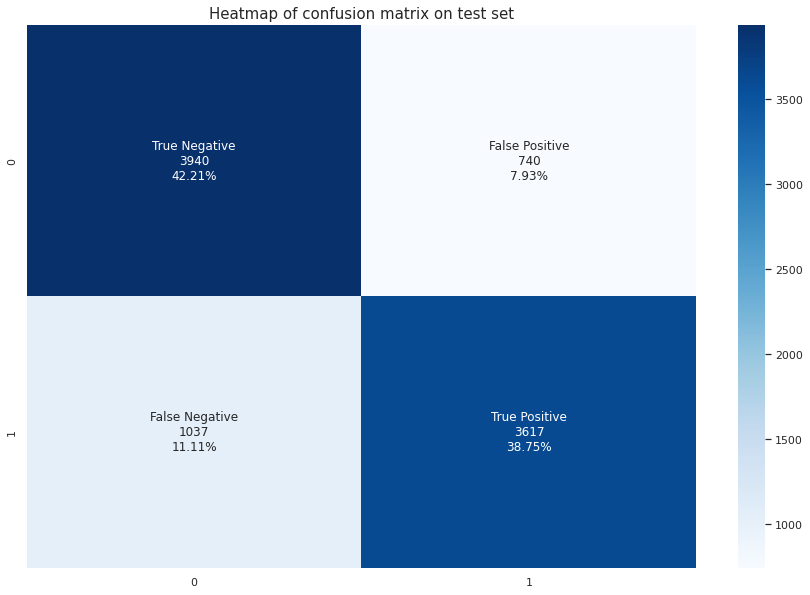



============================== Confusion Matrix on train set ==============================


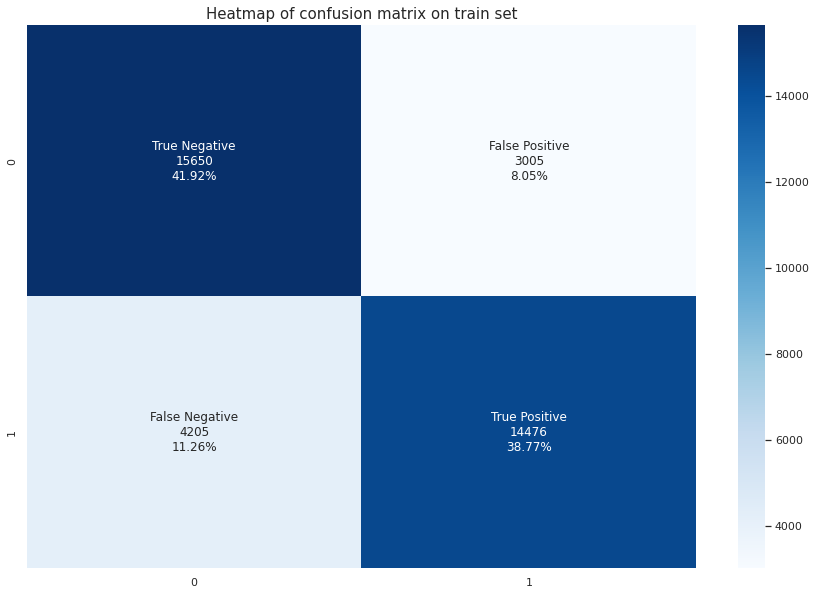



======================================== Top 10 Feature Importance ========================================


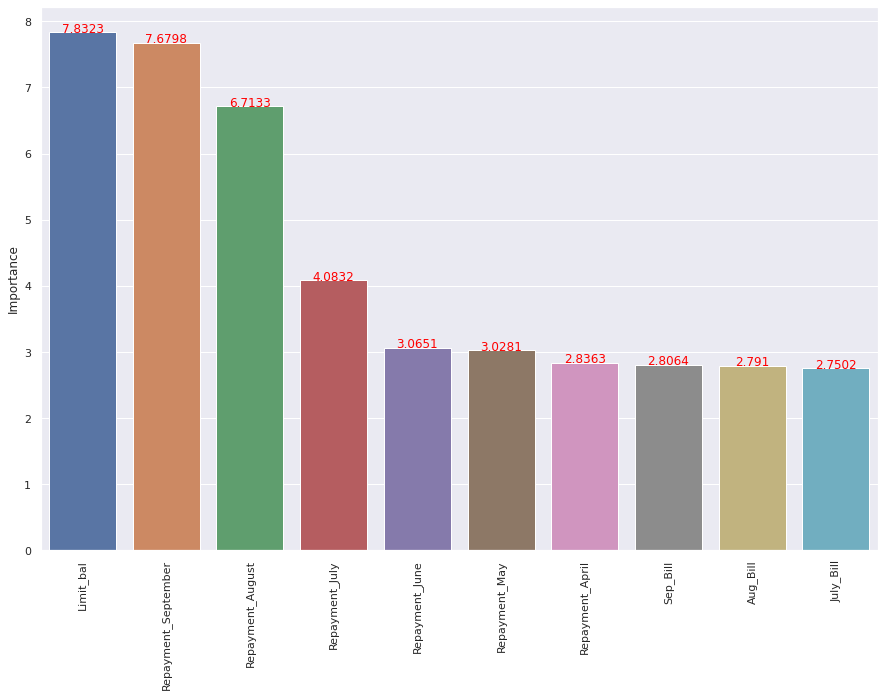

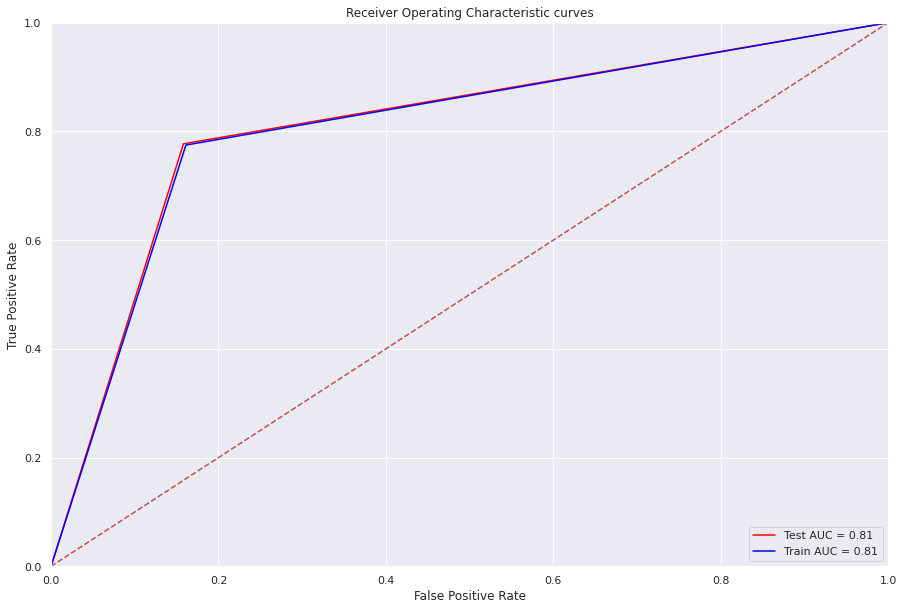

In [ ]:
# Fit and evalute model with the help of self define function
logistic_train_pred, logistic_test_pred = matrix(logistic_grid_search,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

In [ ]:
print(logistic_train_pred,logistic_test_pred)

[1 1 0 ... 1 1 0] [1 0 0 ... 0 0 1]


#<b> Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# parameter
sgd_params  = {'penalty':['l2', 'l1', 'elasticnet'],
               'alpha':[0.01,0.001,0.0001],
               'max_iter':[1500],
               'class_weight':['dict','balanced']
    
}

In [ ]:
sgd_grid = GridSearchCV(SGDClassifier(),param_grid=sgd_params,cv=2,scoring='recall')



============================== Training score ==============================


Training score  =  0.7756008778973288


==================== Best Parameters and Best score ====================
best parameters  =   {'alpha': 0.0001, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l1'}
Best score  =   0.7753860968899744


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8016927362331262
Test Accuracy score =  0.8039425755303192
Train Precision score =  0.8185413253488504
Test Precision score =  0.8203266787658802
Train Recall score =  0.7756008778973288
Test Recall score =  0.7769660507090674
Train F1 score =  0.7964927711505689
Test F1 score =  0.7980578238799382
Train ROC_AUC score =  0.8017109187128028
Test ROC_AUC score =  0.8038676407391491


============================== Classification Report on test set ==============================
              precision    recall  f1-score   support

     

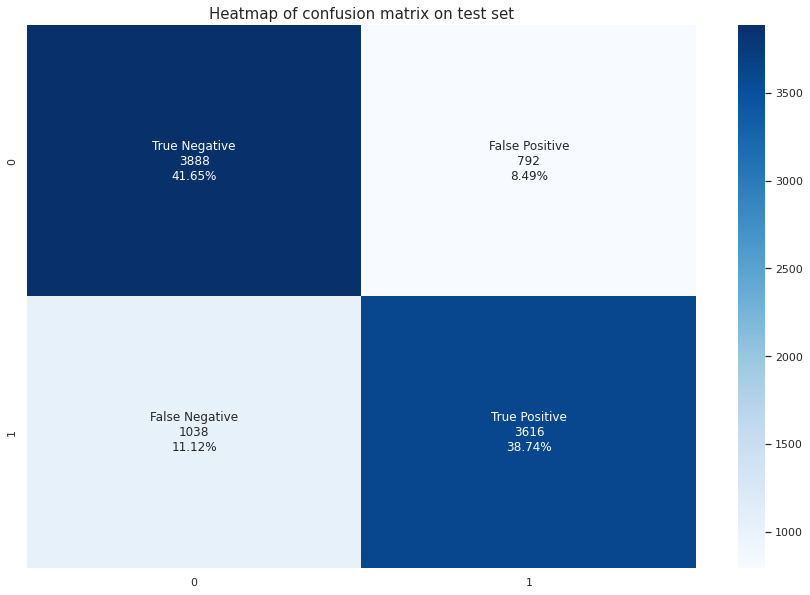



============================== Confusion Matrix on train set ==============================


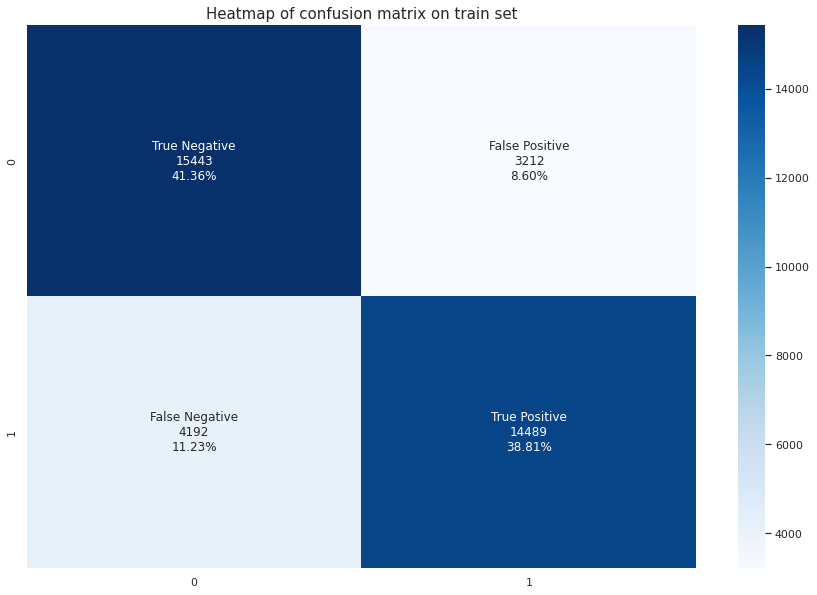



======================================== Top 10 Feature Importance ========================================


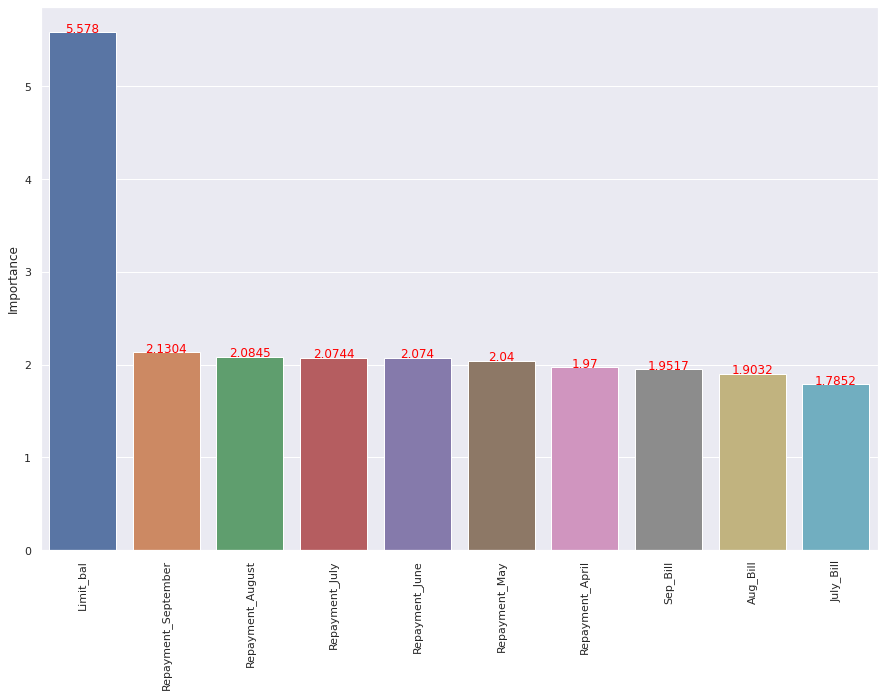

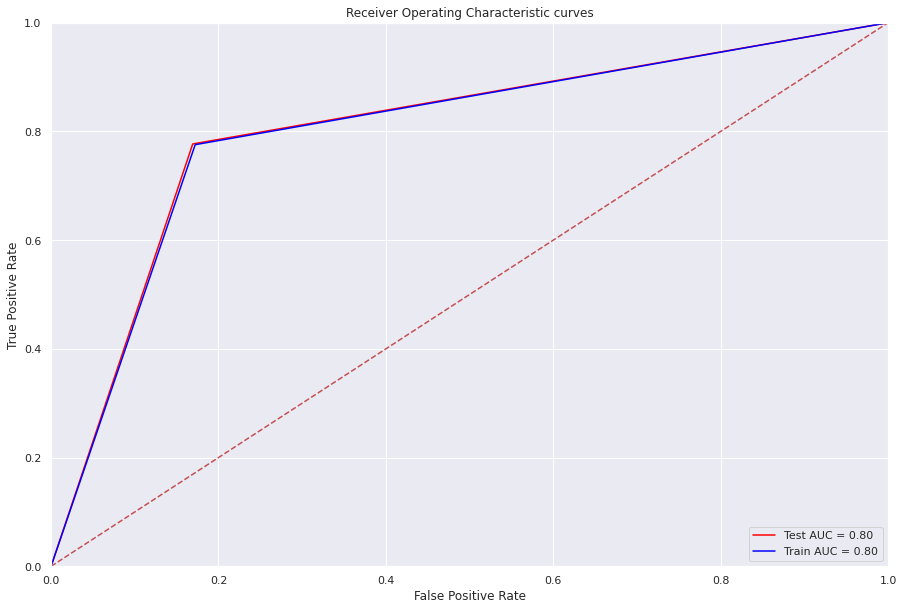

In [ ]:
sgd_train_pred, sgd_test_pred =  matrix(sgd_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

#<b> Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 

In [ ]:
#
svc_params = {'C': range(5,10,15),
              'kernel':['linear', 'poly', 'rbf', 'sigmoid',],    
}

In [ ]:
svc_grid = GridSearchCV(SVC(),param_grid=svc_params,cv=2,)



============================== Training score ==============================


Training score  =  0.8236286693807585


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 5, 'kernel': 'rbf'}
Best score  =   0.8135311763445467


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8236286693807585
Test Accuracy score =  0.8149775016070281
Train Precision score =  0.8722304283604135
Test Precision score =  0.8610905502097211
Train Recall score =  0.7586317648948129
Test Recall score =  0.7498925655350236
Train F1 score =  0.8114747058318302
Test F1 score =  0.8016538417365338
Train ROC_AUC score =  0.8236739633908533
Test ROC_AUC score =  0.8147967101179392


============================== Classification Report on test set ==============================
              precision    recall  f1-score   support

     class 0       0.78      0.88      0.83      4680
     c

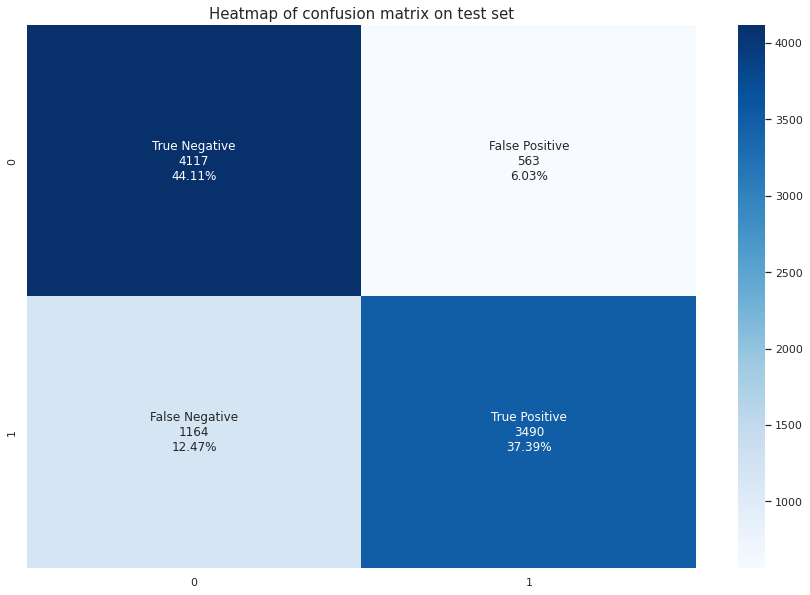



============================== Confusion Matrix on train set ==============================


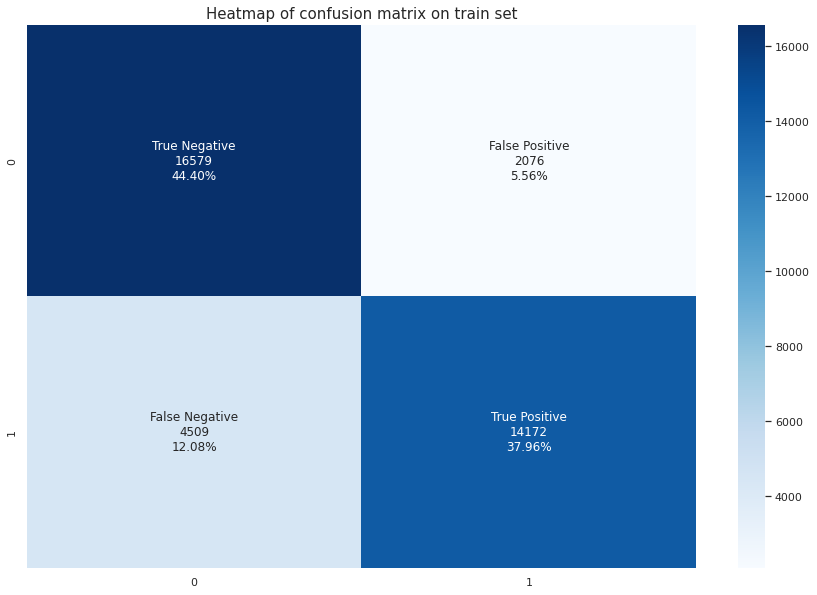



======================================== Top 10 Feature Importance ========================================


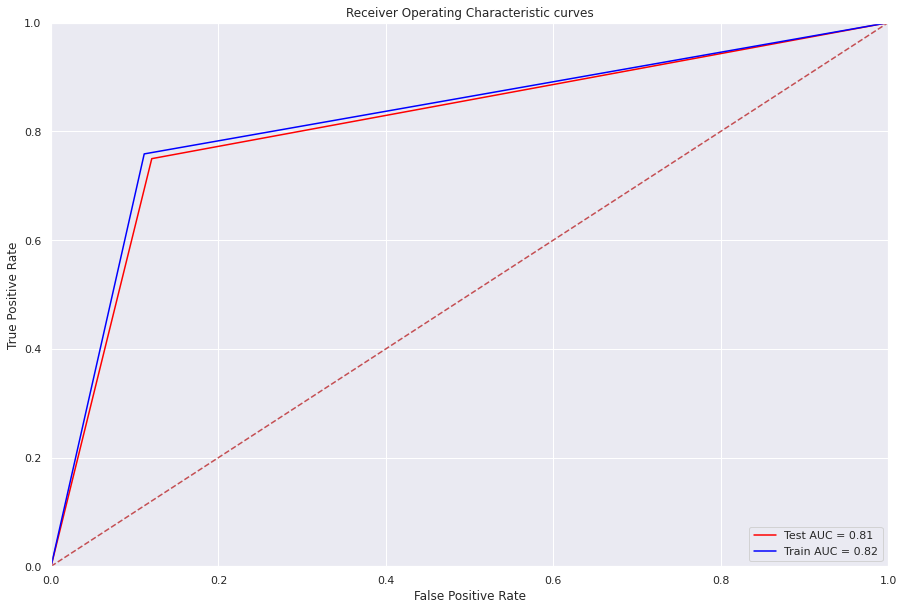

In [ ]:
svc_train_pred, svc_test_pred = matrix(svc_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

#<b>K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params,cv=2,verbose=True)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


============================== Training score ==============================


Training score  =  0.9985001071352047


==================== Best Parameters and Best score ====================
best parameters  =   {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}
Best score  =   0.8190486393829013


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.9985001071352047
Test Accuracy score =  0.8283694021855582
Train Precision score =  0.998661311914324
Test Precision score =  0.8511274735388863
Train Recall score =  0.9983405599271987
Test Recall score =  0.794800171895144
Train F1 score =  0.9985009101616876
Test F1 score =  0.8220000000000001
Train ROC_AUC score =  0.9985002183179279
Test ROC_AUC score =  0.8282761543236403


============================== Classification Report on test set ==============================
              pr

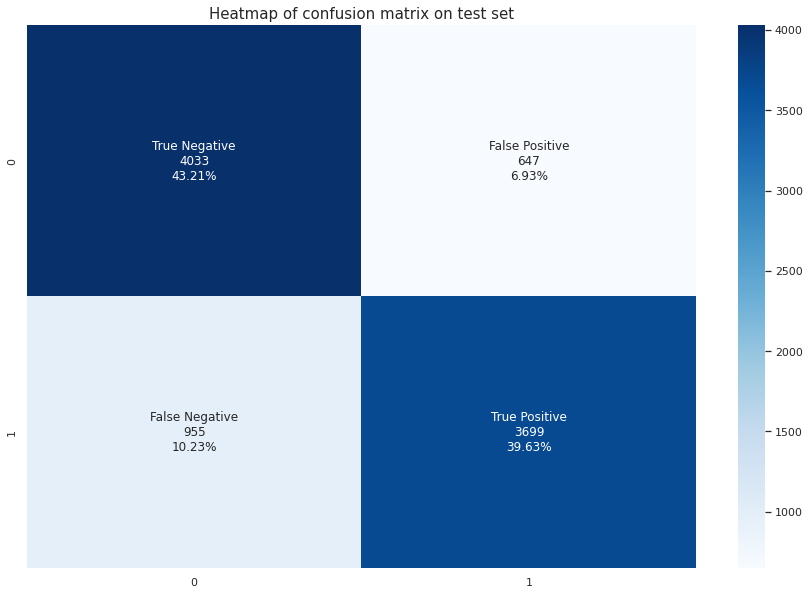



============================== Confusion Matrix on train set ==============================


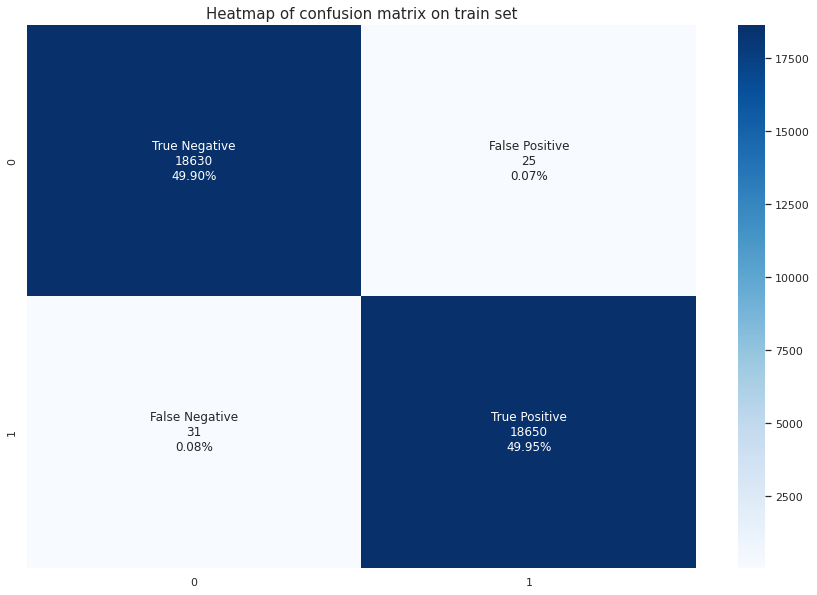



======================================== Top 10 Feature Importance ========================================


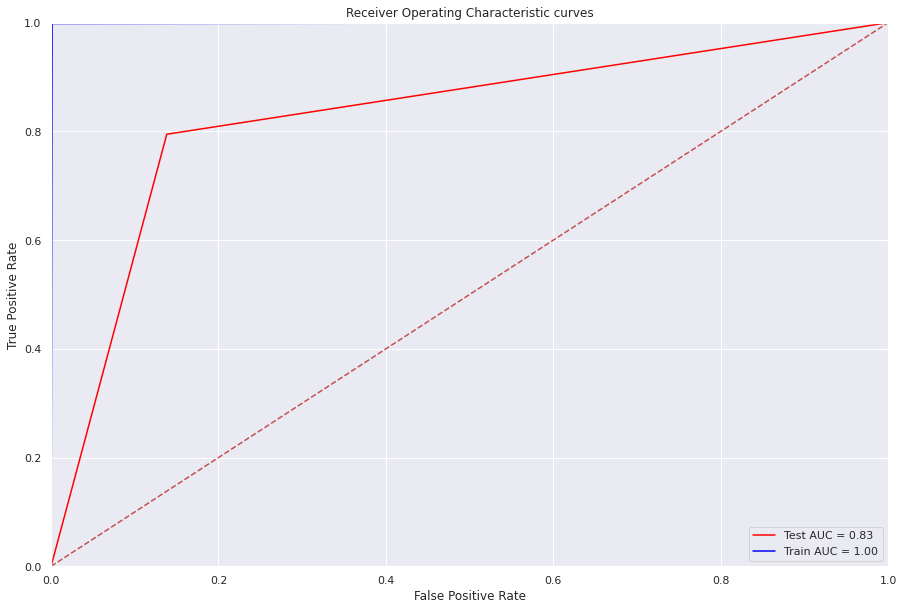

In [ ]:
knn_train_pred, knn_test_pred = matrix(knn_grid,X_train_scaled,X_test_scaled,y_train,y_test)

#<b> Decision Tree

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Para
d_tree_params : {
    'max_depth': [10,],#2, 3, 5, 10, 20],
    'min_samples_leaf': [100,],#5, 10, 20, 50, 100],
    'criterion': ["entropy",],#"gini", ]
}

In [ ]:
dtree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=2,verbose=True)

NameError: ignored

In [ ]:
dstree_train_pred, dstree_test_predmatrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

#<b> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_params = {'n_estimators':[200],
             'criterion':['gini'],
              'min_samples_leaf':[8],
              'max_depth' : [50],
              'min_samples_split': [10],
              'max_features':['sqrt',]
              }

In [ ]:
rf_random = GridSearchCV(RandomForestClassifier(),rf_params,cv=2,scoring='recall',verbose=True)

In [ ]:
rf_train_pred, rf_test_pred = matrix(rf_random,X_train_scaled,X_test_scaled,y_train,y_test)

##<b> Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# parameters for Gradient Boosting 
gb_params={'loss':['deviance', 'exponential'],
            # 'min_impurity_decrease':[0.4,0.2,0.6],
            'criterion':['mse','mae'],
            'n_estimators':[800,600,400,], 
            'learning_rate': [0.01,0.03,0.1,0.05], 
            'min_samples_leaf':[6,4,8],
            'max_depth':[25,15,20,30],
            # 'subsample':[0.7,0.5,1.0],
            # 'max_leaf_nodes':[17,15,10,20],
            'max_features':['auto','sqrt', 'log2'] 
            }

In [ ]:
gb_random = RandomizedSearchCV(GradientBoostingClassifier(),gb_params,scoring='recall',verbose=True,cv=2)

In [ ]:
gb_grid = GridSearchCV(GradientBoostingClassifier(),gb_params,cv=2,scoring='recall',verbose=True)

In [ ]:
gb_train_pred, gb_test_pred matrix(gb_random,X_train_scaled,X_test_scaled,y_train,y_test)

##<b> Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
#importing Extreme Gradient Boosting Regressor
from xgboost import XGBRegressor

In [ ]:
xgb_params = {
          'subsample': [0.5],#0.3,0.7], 
          'n_thread': [4], #2,6],
          'n_estimators': [1000],#range(200,1500,50), 
          'min_child_weight': [2],#3,5], 
          'max_depth': [4],#range(2,8,2), 
          'learning_rate': [0.02],#0.04,0.06], 
          'eval_mertric': ['rmse'],#'mse',], 
          'colsample_bytree': [0.7],#0.5,1.0],  
          }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [ ]:
xgb_grid_search= GridSearchCV(XGBRegressor(silent=True),param_grid=xgb_params,cv=2)

In [ ]:
xgb_train_pred, xgb_test_pred = matrix(xgb_grid_search,X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def fit_and_score(x_train,x_test,y_train,y_test):
  log = LogisticRegression()
  knn =KNeighborsClassifier()
  svc = SVC()
  gauss = GaussianNB()
  tree = DecisionTreeClassifier()
  forest = RandomForestClassifier()
  ada_boost = AdaBoostClassifier()
  gradient =GradientBoostingClassifier()
  xgboost = XGBClassifier()
  model = [log,knn,svc,gauss,tree,forest,ada_boost,gradient,xgboost]
  train_accuracy = []
  test_accuracy = []
  
  Precision_score = []
  Recall_score = []
  F1_score = []


  for i in model:
    i.fit(x_train,y_train)
    train_score.append(i.score(x_train,y_train))
    pred = i.predict(x_test)
    test_score.append(accuracy_score(y_test,pred))
    Precision_score.append(precision_score(y_test,pred))
    Recall_score.append(recall_score(y_test,pred))
    F1_score.append(f1_score(y_test,pred))

  scores= pd.DataFrame(list(zip(train_score,test_score,Precision_score,Recall_score,F1_score)),index=['Logistic','KNeighbors','SVC Linear','SVC rbf','GaussianNB','Xg boost'],columns=['Train_score','Test_score','Precision','Recall','F1'])
  return scores
